In [1]:
# Data set: https://www.kaggle.com/mirichoi0218/insurance
# Method: multiple regression

# To help visualize the difference between simple and multiple regression:
# Simple regression (2d space): We have a 2d coordinage system, where we try to find the best line for all data points.
# Multiple Regression (3d space): We have 3d coordinate system, where we try to find the best plain for all data points.
# Mutiple Regression (xd space): Same principle, but hard to imagine.
# import matplotlib.pyplot as plt

In [2]:
from keras import models
from keras import layers
from keras import optimizers
from sklearn import preprocessing
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Using TensorFlow backend.


In [3]:
# Load raw data.
raw_insurance_data = pd.read_csv('insurance.csv', sep=',',header=1).values
print(raw_insurance_data[0])

# Shuffle data.
raw_insurance_data = shuffle(raw_insurance_data, random_state=0)
print(raw_insurance_data)

# Split into train data and train targets.
insurance_data_x = raw_insurance_data[:, 0:5] # TODO: handle location also
insurance_data_y = raw_insurance_data[:, 6]
print(insurance_data_x[0])
print(insurance_data_y[0])

# Replace gender with a number. 0 - male, 1 - female.
for i in insurance_data_x:
    if i[1] == 'male':
        i[1] = 0
    else:
        i[1] = 1
print(insurance_data_x)

# Replace smoker with a number. 0 - no smoker, 1 - smoker.
for i in insurance_data_x:
    if i[4] == 'no':
        i[4] = 0
    else:
        i[4] = 1
print(insurance_data_x)

# Normalize all values between 0 and 1.
min_max_scaler = preprocessing.MinMaxScaler()
v = insurance_data_x[:]
v_scaled = min_max_scaler.fit_transform(v)
insurance_data_x = v_scaled
print(insurance_data_x)

# Save some values later for manual for testing.
insurance_data_x_not_used_for_learning = insurance_data_x[-10:]
insurance_data_y_not_used_for_learning = insurance_data_y[-10:]
insurance_data_x = insurance_data_x[:-10]
insurance_data_y = insurance_data_y[:-10]
print(len(insurance_data_x_not_used_for_learning))
print(len(insurance_data_y_not_used_for_learning))
print(len(insurance_data_x))
print(len(insurance_data_y))

[18 'male' 33.77 1 'no' 'southeast' 1725.5523]
[[18 'female' 39.82 ... 'no' 'southeast' 1633.9618]
 [47 'female' 29.37 ... 'no' 'southeast' 8547.6913]
 [46 'female' 32.3 ... 'no' 'northeast' 9411.005]
 ...
 [29 'male' 37.29 ... 'no' 'southeast' 4058.1161]
 [46 'female' 19.95 ... 'no' 'northwest' 9193.8385]
 [53 'male' 26.41 ... 'no' 'northeast' 11244.3769]]
[18 'female' 39.82 0 'no']
1633.9618
[[18 1 39.82 0 'no']
 [47 1 29.37 1 'no']
 [46 1 32.3 2 'no']
 ...
 [29 0 37.29 2 'no']
 [46 1 19.95 2 'no']
 [53 0 26.41 2 'no']]
[[18 1 39.82 0 0]
 [47 1 29.37 1 0]
 [46 1 32.3 2 0]
 ...
 [29 0 37.29 2 0]
 [46 1 19.95 2 0]
 [53 0 26.41 2 0]]
[[0.         1.         0.64191552 0.         0.        ]
 [0.63043478 1.         0.36077482 0.2        0.        ]
 [0.60869565 1.         0.43960183 0.4        0.        ]
 ...
 [0.23913043 0.         0.57384988 0.4        0.        ]
 [0.60869565 1.         0.10734463 0.4        0.        ]
 [0.76086957 0.         0.2811407  0.4        0.        ]]
10
10

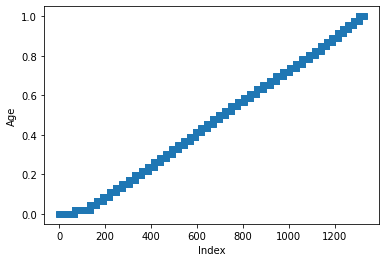

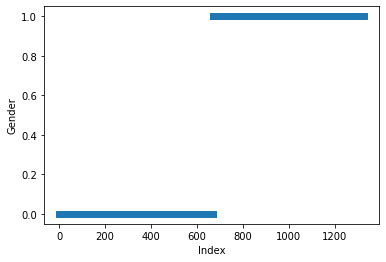

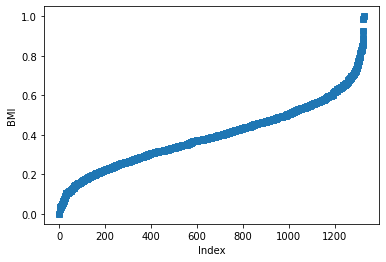

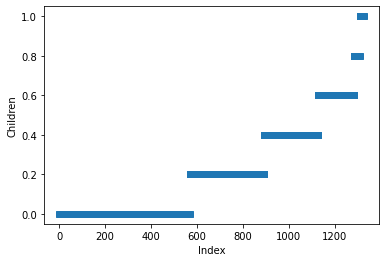

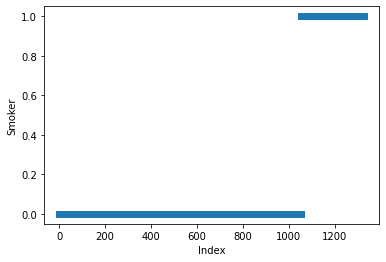

In [4]:
# Plot distributions of the dimensions.
age_data = insurance_data_x[:,0]
age_data.sort()
plt.plot(range(1, len(age_data) + 1), age_data, 's') 
plt.xlabel('Index')
plt.ylabel('Age')
plt.show()

gender_data = insurance_data_x[:,1]
gender_data.sort()
plt.plot(range(1, len(gender_data) + 1), gender_data, 's') 
plt.xlabel('Index')
plt.ylabel('Gender')
plt.show()

bmi_data = insurance_data_x[:,2]
bmi_data.sort()
plt.plot(range(1, len(bmi_data) + 1), bmi_data, 's') 
plt.xlabel('Index')
plt.ylabel('BMI')
plt.show()

children_data = insurance_data_x[:,3]
children_data.sort()
plt.plot(range(1, len(children_data) + 1), children_data, 's') 
plt.xlabel('Index')
plt.ylabel('Children')
plt.show()

smoker_data = insurance_data_x[:,4]
smoker_data.sort()
plt.plot(range(1, len(smoker_data) + 1), smoker_data, 's') 
plt.xlabel('Index')
plt.ylabel('Smoker')
plt.show()

In [5]:
# Split into train and validation data.
insurance_data_x_train = insurance_data_x[:-100]
insurance_data_x_val =insurance_data_x[-100:]
insurance_data_y_train = insurance_data_y[:-100]
insurance_data_y_val =insurance_data_y[-100:]
print(insurance_data_x_train)
print(insurance_data_x_val)
print(insurance_data_y_train)
print(insurance_data_y_val)

[[0.         0.         0.         0.         0.        ]
 [0.         0.         0.02300242 0.         0.        ]
 [0.         0.         0.02300242 0.         0.        ]
 ...
 [1.         1.         0.82243745 1.         1.        ]
 [1.         1.         0.82243745 1.         1.        ]
 [1.         1.         0.82701103 1.         1.        ]]
[[1.         1.         0.8283562  1.         1.        ]
 [1.         1.         0.84611246 1.         1.        ]
 [1.         1.         0.84907183 1.         1.        ]
 [1.         1.         0.85122411 1.         1.        ]
 [1.         1.         0.85499058 1.         1.        ]
 [1.         1.         0.86386871 1.         1.        ]
 [1.         1.         0.89050309 1.         1.        ]
 [1.         1.         0.9260156  1.         1.        ]
 [1.         1.         0.98520312 1.         1.        ]
 [1.         1.         1.         1.         1.        ]]
[1633.9618 8547.6913 9411.005 ... 7985.815 2902.9065 11381.3254]


In [13]:
# Method for creating our model.
def build_model():
    model = models.Sequential() 
    model.add(layers.Dense(64, activation='relu',input_shape=(insurance_data_x.shape[1],))) 
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae']) 
    return model

In [14]:
# Build and train our model.
model = build_model()
history = model.fit(insurance_data_x_train, insurance_data_y_train,
                        validation_data=(insurance_data_x_val, insurance_data_y_val),
                        epochs=20, batch_size=1)

Train on 1317 samples, validate on 10 samples
Epoch 1/20
1317/1317 [==============================] - 1s 770us/step - loss: 304833428.3863 - mae: 12544.5400 - val_loss: 469711366.4250 - val_mae: 14746.9326
Epoch 2/20
1317/1317 [==============================] - 1s 691us/step - loss: 206362690.7432 - mae: 9411.2217 - val_loss: 262221193.2000 - val_mae: 12923.5918
Epoch 3/20
1317/1317 [==============================] - 1s 684us/step - loss: 169620459.1204 - mae: 8996.4014 - val_loss: 252291451.6000 - val_mae: 13800.2080
Epoch 4/20
1317/1317 [==============================] - 1s 695us/step - loss: 162633171.7756 - mae: 9037.7197 - val_loss: 254338902.6000 - val_mae: 13506.2314
Epoch 5/20
1317/1317 [==============================] - 1s 664us/step - loss: 158658399.4034 - mae: 8911.8076 - val_loss: 254035800.8000 - val_mae: 13522.4121
Epoch 6/20
1317/1317 [==============================] - 1s 664us/step - loss: 155014802.7747 - mae: 8945.9375 - val_loss: 259727086.2000 - val_mae: 13039.1719

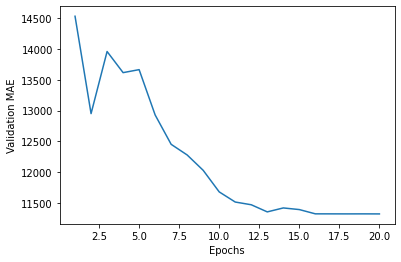

In [7]:
# Print our val loss to catch over/underfitting better.
mae_history = history.history['val_mae']
plt.plot(range(1, len(mae_history) + 1), mae_history) 
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

[ 9174  4561  1633 12928 12950  9095  4402  4058  9193 11244]
[14919 10955 13374 14793 16552 11850 14136 14190 11028 13591]


In [20]:
# Build and train our model with k-fold.
k = 4
num_val_samples = len(insurance_data_x_train) // k
num_epochs = 50
all_mae_histories = []
all_scores = []
for i in range(k):
    print('processing fold #', i)
    # Keep in mind we use here insurance_data_x and insurance_data_y and not insurance_data_x_train and not insurance_data_y_train.
    # Since the validation data will be always on partition within the k-fold run.
    val_data = insurance_data_x[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = insurance_data_y[i * num_val_samples: (i + 1) * num_val_samples]


    partial_train_data = np.concatenate(
        [insurance_data_x[:i * num_val_samples],
         insurance_data_x[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [insurance_data_y[:i * num_val_samples],
         insurance_data_y[(i + 1) * num_val_samples:]],
        axis=0)

    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=1)
    print(history.history)
    mae_history = history.history['val_mae']
    all_mae_histories.append(mae_history)
    
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

processing fold # 0
Train on 998 samples, validate on 329 samples
Epoch 1/50
998/998 [==============================] - 1s 999us/step - loss: 309714603.1755 - mae: 12808.0654 - val_loss: 317182902.3041 - val_mae: 12798.4678
Epoch 2/50
998/998 [==============================] - 1s 844us/step - loss: 233181985.9889 - mae: 10093.4365 - val_loss: 261183814.4141 - val_mae: 10655.2588
Epoch 3/50
998/998 [==============================] - 1s 823us/step - loss: 170427481.9943 - mae: 8800.8193 - val_loss: 228701677.8258 - val_mae: 9623.9092
Epoch 4/50
998/998 [==============================] - 1s 771us/step - loss: 160095841.5946 - mae: 8928.1621 - val_loss: 215720274.4438 - val_mae: 9270.3096
Epoch 5/50
998/998 [==============================] - 1s 775us/step - loss: 157149470.4375 - mae: 9021.2510 - val_loss: 210186298.5401 - val_mae: 9138.6592
Epoch 6/50
998/998 [==============================] - 1s 785us/step - loss: 155397340.1353 - mae: 8976.1797 - val_loss: 206144847.2741 - val_mae: 9048

Train on 998 samples, validate on 329 samples
Epoch 1/50
998/998 [==============================] - 1s 834us/step - loss: 326081124.1498 - mae: 13158.4551 - val_loss: 270607252.4064 - val_mae: 11841.7168
Epoch 2/50
998/998 [==============================] - 1s 731us/step - loss: 252579488.3139 - mae: 10643.5371 - val_loss: 204205865.8865 - val_mae: 9179.5029
Epoch 3/50
998/998 [==============================] - 1s 724us/step - loss: 191102376.2644 - mae: 9306.4121 - val_loss: 170010699.9656 - val_mae: 8196.6445
Epoch 4/50
998/998 [==============================] - 1s 734us/step - loss: 178032212.5573 - mae: 9346.8486 - val_loss: 157296232.8810 - val_mae: 7944.4292
Epoch 5/50
998/998 [==============================] - 1s 732us/step - loss: 173614923.9744 - mae: 9470.2676 - val_loss: 153121024.5304 - val_mae: 7870.7432
Epoch 6/50
998/998 [==============================] - 1s 731us/step - loss: 170845066.6842 - mae: 9386.2812 - val_loss: 150255470.6969 - val_mae: 7832.2939
Epoch 7/50
998/

Train on 998 samples, validate on 329 samples
Epoch 1/50
998/998 [==============================] - 1s 821us/step - loss: 309320778.6716 - mae: 12815.7090 - val_loss: 318667603.0660 - val_mae: 12791.2412
Epoch 2/50
998/998 [==============================] - 1s 818us/step - loss: 251340598.4801 - mae: 10594.2139 - val_loss: 214690198.1484 - val_mae: 9743.6748
Epoch 3/50
998/998 [==============================] - 1s 758us/step - loss: 188296059.0820 - mae: 9002.7051 - val_loss: 167157246.6601 - val_mae: 9056.5371
Epoch 4/50
998/998 [==============================] - 1s 762us/step - loss: 170640269.7737 - mae: 8878.6006 - val_loss: 159132185.6272 - val_mae: 9223.8789
Epoch 5/50
998/998 [==============================] - 1s 752us/step - loss: 163550824.6771 - mae: 8835.6436 - val_loss: 157528885.1358 - val_mae: 9309.9248
Epoch 6/50
998/998 [==============================] - 1s 777us/step - loss: 158570293.1087 - mae: 8819.4893 - val_loss: 157227828.8029 - val_mae: 9318.5898
Epoch 7/50
998/

Train on 998 samples, validate on 329 samples
Epoch 1/50
998/998 [==============================] - 1s 829us/step - loss: 321686940.2313 - mae: 13191.1250 - val_loss: 274591591.3428 - val_mae: 11355.5449
Epoch 2/50
998/998 [==============================] - 1s 734us/step - loss: 261052843.4698 - mae: 10988.9229 - val_loss: 160853847.6913 - val_mae: 7999.6396
Epoch 3/50
998/998 [==============================] - 1s 740us/step - loss: 185790565.5587 - mae: 8955.9541 - val_loss: 159260031.1406 - val_mae: 10448.9932
Epoch 4/50
998/998 [==============================] - 1s 737us/step - loss: 161632739.2968 - mae: 8896.4346 - val_loss: 180211645.6658 - val_mae: 11773.1162
Epoch 5/50
998/998 [==============================] - 1s 734us/step - loss: 157159530.7383 - mae: 9046.3047 - val_loss: 176610430.8198 - val_mae: 11590.5469
Epoch 6/50
998/998 [==============================] - 1s 742us/step - loss: 155495788.8518 - mae: 8998.9004 - val_loss: 174751444.3180 - val_mae: 11496.4209
Epoch 7/50


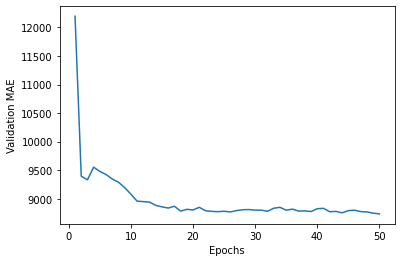

In [21]:
# Print our val loss to catch over/underfitting better.
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history) 
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [23]:
# Create Model based on whole train data.
model = build_model() 
model.fit(insurance_data_x, insurance_data_y,epochs=20, batch_size=1)
predictions = model.predict(insurance_data_x_not_used_for_learning)
print(np.int_(insurance_data_y_not_used_for_learning))
print(np.int_(predictions.reshape(len(predictions))))

[ 9174  4561  1633 12928 12950  9095  4402  4058  9193 11244]
[14806 10672 13107 14657 16414 11621 14020 14026 10821 13475]
